In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
from collections import Counter
import pickle
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from dtreeviz.trees import *

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data=data.sample(frac=1).reset_index(drop=True)
y=data[4].tolist()
x=data.drop([4],axis=1)

In [3]:
cols=['variance of Wavelet Transformed image (continuous)','skewness of Wavelet Transformed image (continuous)','curtosis of Wavelet Transformed image (continuous)','entropy of image (continuous)','class (integer)']
data_withcols=pd.DataFrame(data.to_numpy(),columns=cols)
data_withcols

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous),class (integer)
0,-0.048008,-0.56078,7.72150,0.45300,0.0
1,3.435900,0.66216,2.10410,1.89220,0.0
2,-1.839100,-9.08830,9.24160,-0.10432,1.0
3,-2.379700,-1.44020,1.12730,0.16076,1.0
4,-0.295100,9.04890,-0.52725,-2.07890,0.0
...,...,...,...,...,...
1367,3.549900,8.61650,-3.27940,-1.20090,0.0
1368,-4.553100,-12.58540,15.44170,-1.49830,1.0
1369,1.351800,1.05950,-2.34370,0.39998,1.0
1370,4.616000,10.17880,-4.21850,-4.42450,0.0


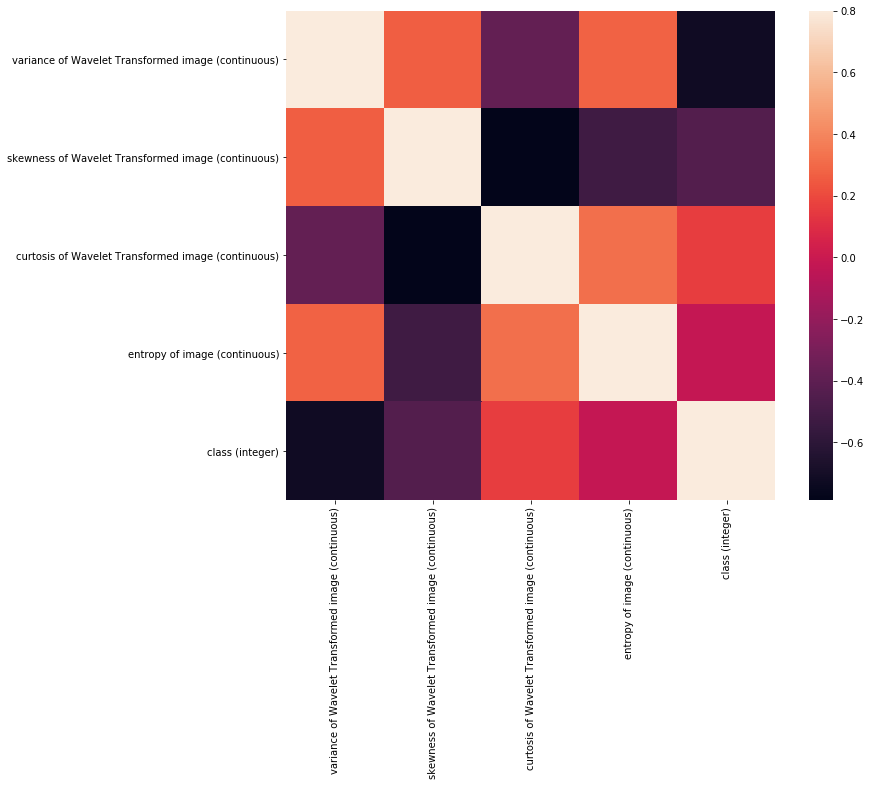

In [4]:
correlation_matrix = data_withcols.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y)

def randomfr(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators = 900)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    filename = 'rfr_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))
    return model
model=randomfr(x_train,x_test,y_train,y_test)

accuracy 0.9941690962099126
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       182
           1       0.99      1.00      0.99       161

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [6]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

In [7]:
xo=data_withcols.columns.tolist()
cl=[q.lower() for q in xo]
a=pd.DataFrame(x_test.to_numpy(),columns=['variance of Wavelet Transformed image (continuous)','skewness of Wavelet Transformed image (continuous)','curtosis of Wavelet Transformed image (continuous)','entropy of image (continuous)'])
a

,variance of Wavelet Transformed image (continuous),skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous)
0,-2.69890,12.19840,0.67661,-8.548200
1,4.17360,3.33360,-1.42440,0.604290
2,-1.66620,-0.30005,1.42380,0.024986
3,4.98800,7.20520,-3.28460,-1.160800
4,-2.10590,1.18150,-0.53324,-0.827160
...,...,...,...,...
338,-1.84830,0.31038,0.77344,1.418900
339,-3.27780,1.80230,0.18050,-2.393100
340,-3.60850,3.32530,-0.51954,-3.573700
341,0.33565,6.83690,0.69718,-0.556910


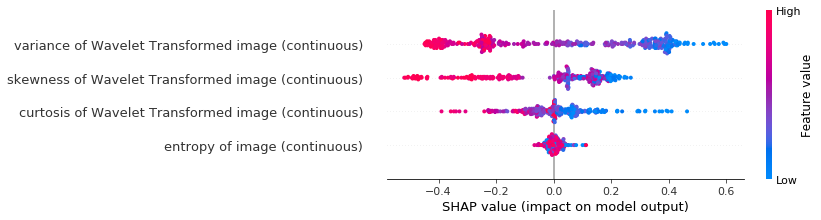

In [8]:
# shap.summary_plot(shap_values,data1)
plt.clf()
shap.summary_plot(shap_values[1],a,show=False)
plt.savefig('feature_imp_shap.png', dpi=300, transparent=False, bbox_inches='tight')

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
path_tree = model.cost_complexity_pruning_path(x_train, y_train)
path_tree

{'ccp_alphas': array([0.        , 0.00089083, 0.00096077, 0.00128899, 0.00302343,
        0.00454008, 0.00515811, 0.00838582, 0.00840482, 0.00932945,
        0.01853298, 0.02610709, 0.02918775, 0.0694396 , 0.24552468]),
 'impurities': array([0.        , 0.00178167, 0.00370321, 0.00757018, 0.01059361,
        0.01967377, 0.02483188, 0.03321769, 0.0752418 , 0.08457125,
        0.12163721, 0.1477443 , 0.17693205, 0.24637165, 0.49189633])}

Text(0.5, 0, 'effective alpha')

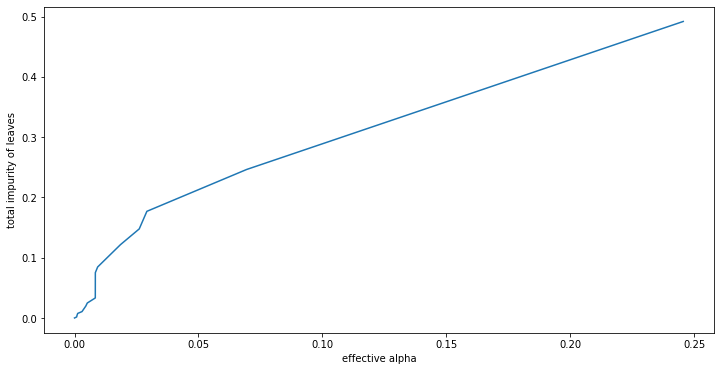

In [10]:
ccp_a= path_tree.ccp_alphas
impurities=path_tree.impurities

plt.figure(figsize=(12, 6))
plt.plot(ccp_a, impurities)
plt.ylabel("total impurity of leaves")
plt.xlabel("effective alpha")


In [12]:
models = []
for asd in ccp_a:
    model = DecisionTreeClassifier(ccp_alpha=asd)
    model.fit(x_train, y_train)
    models.append(model)

Text(0, 0.5, 'total depth')

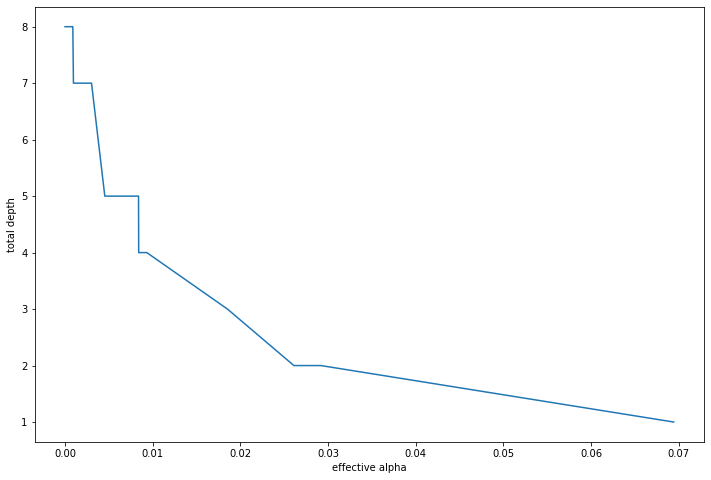

In [13]:
tree_depths = [model.tree_.max_depth for model in models]
plt.figure(figsize=(12,  8))
plt.plot(ccp_a[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

Text(0.5, 0, 'effective alpha')

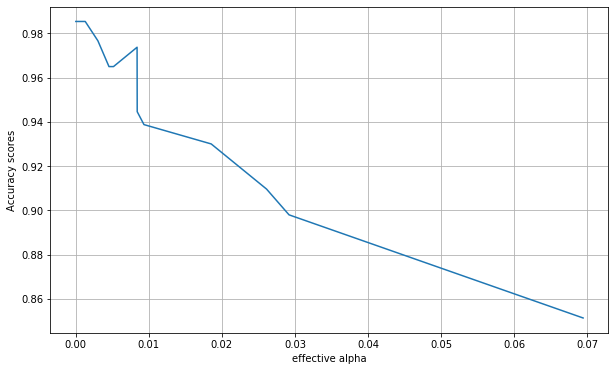

In [15]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, model.predict(x_test)) for model in models]

tree_depths = [model.tree_.max_depth for model in models]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_a[:-1], acc_scores[:-1])
plt.ylabel("Accuracy scores")
plt.xlabel("effective alpha")


In [16]:
def randomfr(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(max_depth=8)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    filename = 'rfr_model.sav'
    pickle.dump(model, open(filename, 'wb'))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred))
    return model
model=randomfr(x_train,x_test,y_train,y_test)

accuracy 0.9912536443148688
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       182
           1       0.99      0.99      0.99       161

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

